In [1]:
import os
import datetime
import re

import geopandas as gpd
import pandas as pd

import pyproj.crs as CRS
from shapely.geometry import Polygon, LineString, Point

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_gdf = gpd.read_file("fire_nrt_J1V-C2_262461.shp")
data_gdf.drop(data_gdf.columns.difference(['ACQ_DATE','ACQ_TIME', 'CONFIDENCE', 'SCAN', 'TRACK', 'geometry']), axis=1, inplace=True)
data_gdf['date'] = data_gdf.ACQ_DATE.apply(pd.Timestamp)
data_gdf['datetime'] = data_gdf.apply(lambda x: pd.Timestamp(f"{x['ACQ_DATE']}/{x['ACQ_TIME']}"), axis=1)
data_gdf.drop('ACQ_DATE', axis=1, inplace=True)

In [3]:
data_gdf = data_gdf.to_crs(3857)

In [4]:
data_gdf['area'] = data_gdf.SCAN * data_gdf.TRACK
data_gdf.drop(['SCAN', 'TRACK'], axis=1, inplace=True)


In [5]:
data_gdf

,ACQ_TIME,CONFIDENCE,geometry,date,datetime,area
0,0030,n,POINT (1029867.816 3239832.490),2021-01-01,2021-01-01 00:30:00,0.2754
1,0030,n,POINT (894096.999 3639819.934),2021-01-01,2021-01-01 00:30:00,0.1995
2,0030,n,POINT (736967.312 4360360.710),2021-01-01,2021-01-01 00:30:00,0.3008
3,0030,n,POINT (666566.639 3717269.176),2021-01-01,2021-01-01 00:30:00,0.3008
4,0030,n,POINT (445488.357 3816779.919),2021-01-01,2021-01-01 00:30:00,0.4402
...,...,...,...,...,...,...
86945,1308,n,POINT (-26182.344 4274583.186),2021-12-31,2021-12-31 13:08:00,0.1480
86946,1308,n,POINT (-29844.755 4275378.005),2021-12-31,2021-12-31 13:08:00,0.1480
86947,1308,n,POINT (-28147.133 4274248.254),2021-12-31,2021-12-31 13:08:00,0.1480
86948,1308,n,POINT (696557.223 4403443.220),2021-12-31,2021-12-31 13:08:00,0.2600


In [6]:
adm_bnd_gdf = gpd.read_file('dz_admbnd/dza_admbnda_adm1_unhcr_20200120.shp')
adm_bnd_gdf.drop(adm_bnd_gdf.columns.difference(['ADM1_EN', 'geometry']),axis=1,inplace=True)
adm_bnd_gdf = adm_bnd_gdf.to_crs(3857)


<AxesSubplot:>

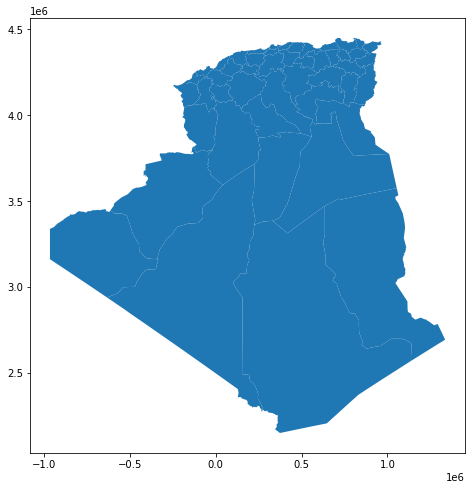

In [7]:
fig,ax = plt.subplots(figsize=(8,8))

adm_bnd_gdf.plot(ax=ax)

In [8]:
#adm_bnd_gdf.plot(ax=ax)
poly = Polygon([[-0.5e6,4.5e6],[-0.5e6,4.0e6],[1.2e6,4.0e6],[1.2e6,4.5e6]])
adm_bnd_north_gdf = adm_bnd_gdf.clip(poly)


<AxesSubplot:>

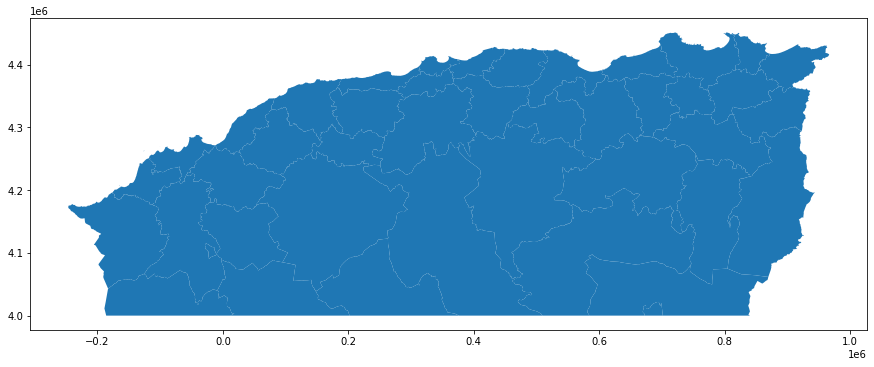

In [9]:
fig,ax = plt.subplots(figsize=(15,15))
adm_bnd_north_gdf.plot(ax=ax)

In [10]:
data_gdf = data_gdf.clip(poly).reset_index().drop('index', axis=1).sort_values(['datetime'])

In [11]:
adm_bnd_gdf

,ADM1_EN,geometry
0,Adrar,"POLYGON ((220925.850 3552876.708, 216562.317 3..."
1,Ain-Defla,"POLYGON ((184210.836 4362845.994, 184208.740 4..."
2,Ain-Temouchent,"MULTIPOLYGON (((-164816.221 4204563.816, -1648..."
3,Alger,"MULTIPOLYGON (((341553.757 4407593.242, 341425..."
4,Annaba,"MULTIPOLYGON (((858252.034 4432142.062, 858197..."
5,Batna,"POLYGON ((653157.485 4283746.993, 654893.296 4..."
6,Bechar,"POLYGON ((-125748.970 3806044.525, -123875.626..."
7,Bejaia,"MULTIPOLYGON (((553920.621 4413462.383, 553927..."
8,Biskra,"POLYGON ((640410.549 4202136.154, 640592.990 4..."
9,Blida,"POLYGON ((357351.733 4393815.341, 358145.112 4..."


In [12]:
data_gdf

,ACQ_TIME,CONFIDENCE,geometry,date,datetime,area
861,0030,n,POINT (772639.643 4421921.740),2021-01-01,2021-01-01 00:30:00,0.2898
4588,0030,n,POINT (909398.977 4195676.028),2021-01-01,2021-01-01 00:30:00,0.2204
6668,0030,n,POINT (641137.928 4212023.391),2021-01-01,2021-01-01 00:30:00,0.3484
1487,0030,n,POINT (776652.710 4420873.904),2021-01-01,2021-01-01 00:30:00,0.2835
6656,0030,n,POINT (641141.268 4211919.660),2021-01-01,2021-01-01 00:30:00,0.3484
...,...,...,...,...,...,...
17582,1308,n,POINT (-28147.133 4274248.254),2021-12-31,2021-12-31 13:08:00,0.1480
15745,1308,n,POINT (-29844.755 4275378.005),2021-12-31,2021-12-31 13:08:00,0.1480
20116,1308,n,POINT (-178321.579 4111005.845),2021-12-31,2021-12-31 13:08:00,0.1368
5505,1308,n,POINT (696557.223 4403443.220),2021-12-31,2021-12-31 13:08:00,0.2600


In [13]:
july_august_data_gdf = data_gdf.loc[data_gdf.date >= pd.Timestamp('2021-07-01/0000')].loc[data_gdf.date <= pd.Timestamp('2021-08-31/2359')]
area_sums = july_august_data_gdf.groupby('date').area.sum()

In [14]:
area_sums

date
2021-07-01     8.5963
2021-07-02    10.7347
2021-07-03     9.4552
2021-07-04    12.2621
2021-07-05    22.9351
               ...   
2021-08-27     9.8774
2021-08-28    16.6142
2021-08-29    11.4051
2021-08-30    11.4643
2021-08-31     4.4547
Name: area, Length: 62, dtype: float64

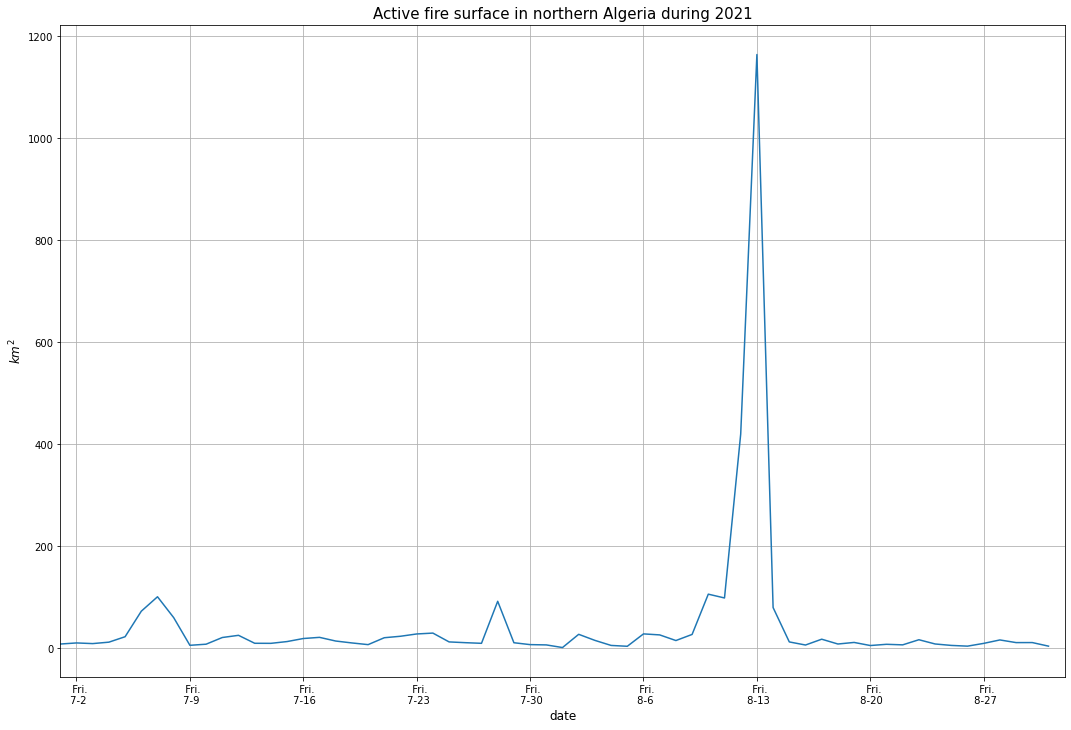

In [15]:
fig,ax = plt.subplots(figsize=(18,12))

x_ticks = [pd.Timestamp(f"2021-{month}-{day}") for month in range(7,9) for day in range(1,31) if pd.Timestamp(f"2021-{month}-{day}").dayofweek == 4]

ax.plot(area_sums.index, area_sums)
ax.set_ylabel(r'$km^2$', fontsize=12)
ax.set_xlabel('date', fontsize=12)
#ax.set_yticks(range(0,180,20), minor=False)
#ax.set_yticks(range(0,183,5), minor=True)
ax.set_xticks(x_ticks, minor=False)
ax.set_xlim(left=pd.Timestamp('2021-07-01'), right=pd.Timestamp('2021-09-01'))
ax.set_xticklabels([f"  Fri.\n {x.month}-{x.day}" for x in x_ticks])
ax.set_title('Active fire surface in northern Algeria during 2021',fontsize=15)
ax.grid(which='both')

plt.savefig('totaltimeanalysis.png')
#ax.set_facecolor('black')
#sns.lineplot(data=df, x='date', y='count', ax=ax, y_label=r'km^2')

In [16]:
fires_adm_gdf = gpd.sjoin(data_gdf, adm_bnd_north_gdf, how='inner', predicate='within').sort_values('datetime')
fires_adm_gdf.drop(['index_right'], axis=1, inplace=True)

In [17]:
fires_adm_gdf

,ACQ_TIME,CONFIDENCE,geometry,date,datetime,area,ADM1_EN
861,0030,n,POINT (772639.643 4421921.740),2021-01-01,2021-01-01 00:30:00,0.2898,Skikda
6656,0030,n,POINT (641141.268 4211919.660),2021-01-01,2021-01-01 00:30:00,0.3484,Batna
2559,0030,n,POINT (915795.394 4415779.530),2021-01-01,2021-01-01 00:30:00,0.2242,El-Tarf
2560,0030,n,POINT (915300.023 4415815.691),2021-01-01,2021-01-01 00:30:00,0.2301,El-Tarf
6668,0030,n,POINT (641137.928 4212023.391),2021-01-01,2021-01-01 00:30:00,0.3484,Batna
...,...,...,...,...,...,...,...
5305,1127,n,POINT (697028.105 4403879.438),2021-12-31,2021-12-31 11:27:00,0.5250,Jijel
17582,1308,n,POINT (-28147.133 4274248.254),2021-12-31,2021-12-31 13:08:00,0.1480,Oran
20116,1308,n,POINT (-178321.579 4111005.845),2021-12-31,2021-12-31 13:08:00,0.1368,Tlemcen
5505,1308,n,POINT (696557.223 4403443.220),2021-12-31,2021-12-31 13:08:00,0.2600,Jijel


In [18]:
grouped_df = fires_adm_gdf.groupby(['date','ACQ_TIME','ADM1_EN']).area.sum()

In [19]:
max_val = 0
date_ = 0
time_ = 0
prov_ = 0

for date in pd.date_range(start='2021-08-08', end='2021-08-15', freq='D'):
    for idx, time_series in grouped_df.loc[date].groupby(level=0):
        for idx2, item in time_series.groupby(level=1):
            if item[0] > max_val:
                max_val = item[0]
                date_ = date
                time_ = idx
                prov_ = idx2
max_val

729.5085999999999

In [20]:
wilaya_index = {}
for ind in adm_bnd_north_gdf.index:
    wilaya_index[adm_bnd_north_gdf.loc[ind,'ADM1_EN']] = ind

In [29]:
adm_fires = adm_bnd_north_gdf.copy()
adm_fires['area'] = 0
vmin = 0
vmax = max_val

total_series = area_sums.loc[area_sums.index >= pd.Timestamp('2021-07-20/0000')]
for date in pd.date_range(start='2021-08-08', end='2021-08-15', freq='D'):
    if date not in grouped_df.index.get_level_values(0):
        continue
    date_grouped_df = grouped_df.loc[pd.Timestamp(date)]
    for time, time_series in date_grouped_df.groupby(level=0):
        adm_fires_day = None #Slightly mitigate memory leaks.
        adm_fires_day = adm_fires.copy()
        for wil, area in time_series.groupby(level=1):
            adm_fires_day.at[wilaya_index[wil],'area'] += area[0]

        fig,ax = plt.subplots(figsize=(20,15))
    
        adm_fires_day.plot(ax=ax, column='area', cmap='Reds', linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, legend_kwds={'shrink':0.5, 'pad':0.01, 'fraction':0.1}, norm=plt.Normalize(vmin=vmin, vmax=vmax));

        ax.axis('off');

        ax.set_title('Detected Square Kilometers on fire by Wilaya', fontsize=18);

        ax.annotate(f"{date.date()}/{time}",
                    xy=(0.1, .225), xycoords='figure fraction',
                    horizontalalignment='left', verticalalignment='top',
                    fontsize=14);
        ax.annotate("Data Source: NASA FIRMS",
                    xy=(.8,.225), xycoords='figure fraction',
                    horizontalalignment='left', verticalalignment='top',
                    fontsize=14);
        #Mini time-series plot
        axins = ax.inset_axes([0.05,0.8,0.3,0.2])
        current_series = total_series.loc[total_series.index <= pd.Timestamp(f"2021-{date.month}-{date.day}/{time}")]
        surface_lim = round(current_series.max())
        
        x_ticks = [date for date in pd.date_range(start='2021-07-25', end=date.date(), freq='D') if date.dayofweek == 4]
        
        axins.plot(current_series.index, current_series)
        axins.set_ylabel(r'$km^2$', fontsize=12)
        axins.set_xlabel('date', fontsize=12)
        axins.set_yticks(range(0,surface_lim+50,50), minor=False)
        axins.set_xticks(x_ticks, minor=False)
        axins.set_xlim(left=pd.Timestamp('2021-07-20'), right=pd.Timestamp(f"2021-{date.month}-{date.day}"))
        axins.set_xticklabels([f"  Fri.\n {x.month}-{x.day}" for x in x_ticks])

        chart = fig #fig.get_figure();
        
        chart.savefig(f"./imgs/image-{date.day_of_year:03d}-{time}_fires.png", dpi=300);
        plt.close(chart)